D:\anaconda3\envs\ZeroPointEnv\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.


      X Position  Y Position   HARDNESS
0       0.000000  247.459500  10.475490
1       0.000000  244.983000   9.790984
2       0.000000  242.458875  11.016381
3       0.000000  239.982375  10.806190
4       0.000000  237.458250   9.795248
...          ...         ...        ...
9995  247.507125    9.953625  11.386159
9996  247.507125    7.477125   9.431331
9997  247.507125    4.953000   7.512587
9998  247.507125    2.476500   8.060126
9999  247.507125    0.000000  11.429229

[10000 rows x 3 columns]

Below are the hardness values... 
           Data
0     10.475491
1      9.790984
2     11.016380
3     10.806190
4      9.795248
...         ...
9995  11.386159
9996   9.431332
9997   7.512587
9998   8.060125
9999  11.429229

[10000 rows x 1 columns]

Below are the x values... 
            Data
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
...          ...
9995  247.507126
9996  247.507126
9997  247.507126
9998  247.507126
9999  247.507126

[10000 r

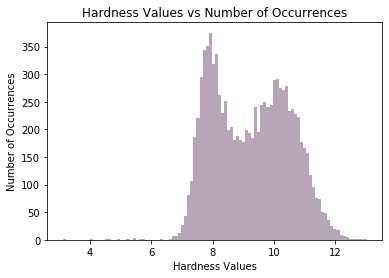

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import interpolate

file_path = "../data/01NOV2019_600degF-5min-Austempering_BCS-1444_small.xlsx"
sheet_name = "Test 1"
use_cols = "A:C"
hard_col_name = "HARDNESS"
x_col_name = "X Position"
y_col_name = "Y Position"
NUM_HIST_BINS = 200
nulls = False


xls = pd.ExcelFile(file_path)

if nulls:
    test1_sheet = pd.read_excel(xls, sheet_name, usecols=use_cols).iloc[:-1]
else:
    test1_sheet = pd.read_excel(xls, sheet_name, usecols=use_cols).dropna()

print(test1_sheet)


# If skip_first_row then read every row after the first, otherwise read them all
# The hardness values
hardness_column = test1_sheet[hard_col_name]
# The x values
x_column = test1_sheet[x_col_name]
# The y values
y_column = test1_sheet[y_col_name]
# The stiffness column
# Asserts that the columns have values
assert hardness_column is not None
assert x_column is not None
assert y_column is not None

hard_df = pd.DataFrame(hardness_column)
x_df = pd.DataFrame(x_column)
y_df = pd.DataFrame(y_column)

# Renames columns of all read data for consistency
hard_df = hard_df.rename(columns={hard_col_name: "Data"})
x_df = x_df.rename(columns={x_col_name: "Data"})
y_df = y_df.rename(columns={y_col_name: "Data"})

# Makes all read data numeric
hard_df["Data"] = pd.to_numeric(hard_df["Data"], downcast="float")
x_df["Data"] = pd.to_numeric(x_df["Data"], downcast="float")
y_df["Data"] = pd.to_numeric(y_df["Data"], downcast="float")
print("\nBelow are the hardness values... ")
print(hard_df)
print("\nBelow are the x values... ")
print(x_df)
print("\nBelow are the y values... ")
print(y_df)

r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

plt.hist(hard_df["Data"].values, bins=100, color=color)  # "darkred"
plt.title("Hardness Values vs Number of Occurrences")
plt.xlabel("Hardness Values")
plt.ylabel("Number of Occurrences")
plt.show()




array
[[10.475491   9.790984  11.01638   ...  7.7815413  7.9517903 10.00282  ]
 [10.603882  10.269708  11.306817  ...  9.6842165  9.903562   7.675217 ]
 [10.291017  11.005476  11.000912  ...  8.851465   9.979945  11.152358 ]
 ...
 [ 8.936709   7.810393   8.252929  ...  9.742907  10.597978   9.891652 ]
 [ 7.995494   7.7740693  7.9441543 ... 10.207329   9.124741   8.328203 ]
 [ 7.8253174  7.9258347  7.8698826 ...  7.512587   8.060125  11.429229 ]]


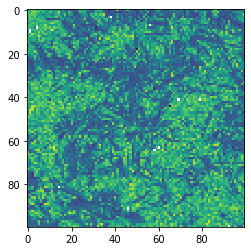

x Values
[  0.         2.524125   5.000625   7.52475   10.00125   12.525375
  15.001875  17.526     20.0025    22.526625  25.003124  27.52725
  30.00375   32.527874  35.004375  37.5285    40.005     42.529125
  45.005627  47.52975   50.00625   52.530376  55.006874  57.531
  60.0075    62.531624  65.008125  67.53225   70.00875   72.532875
  75.00938   77.5335    80.01      82.53413   85.01063   87.53475
  90.01125   92.53538   95.01187   97.536    100.0125   102.53663
 105.01312  107.53725  110.01375  112.53787  115.01437  117.5385
 120.015    122.53912  125.015625 127.53975  130.01625  132.54037
 135.01688  137.49338  140.0175   142.494    145.01813  147.49463
 150.01875  152.49525  155.01938  157.49588  160.02     162.4965
 165.02063  167.49713  170.02126  172.49776  175.02188  177.49838
 180.0225   182.499    185.02313  187.49962  190.02374  192.50024
 195.02437  197.50087  200.025    202.5015   205.02562  207.50212
 210.02625  212.50275  215.02687  217.50337  220.0275   222.504
 225

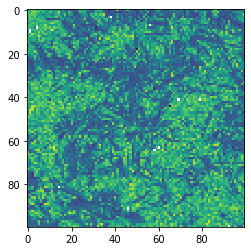

xx
[[  0.         0.         0.       ...   0.         0.         0.      ]
 [  2.524125   2.524125   2.524125 ...   2.524125   2.524125   2.524125]
 [  5.000625   5.000625   5.000625 ...   5.000625   5.000625   5.000625]
 ...
 [242.5065   242.5065   242.5065   ... 242.5065   242.5065   242.5065  ]
 [245.03062  245.03062  245.03062  ... 245.03062  245.03062  245.03062 ]
 [247.50713  247.50713  247.50713  ... 247.50713  247.50713  247.50713 ]]
yy
[[247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 ...
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]]
~array.mask
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 

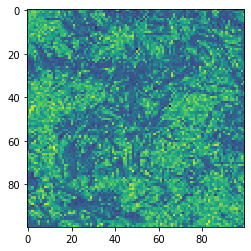

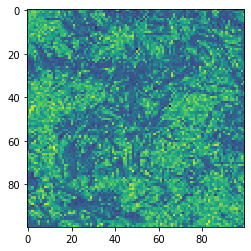

In [2]:
array = hard_df.copy()["Data"].values

# Remove outliers
mean_val = np.mean(array)
stddev_val = np.std(array)
z_scores = 3
# print("Mean value is " + str(mean_val))
# print("Stddev value is " + str(stddev_val))
array[abs(array - mean_val) > stddev_val * z_scores] = np.nan

array = array.reshape(len(np.unique(x_df)), len(np.unique(y_df)))
print("array")
print(array)

plt.imshow(array)
plt.show()

x = np.unique(x_df["Data"].values)
print("x Values")
print(x)
y = np.unique(y_df["Data"].values)
print("y Values")
print(y)
# mask invalid values
# For every invalid value that exists, mark it as being invalid
# https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_invalid.html
array = np.ma.masked_invalid(array)
print("array")
print(array)
# print(grid1)
plt.imshow(array)
plt.show()

# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
# Makes a combination of all possible data values... essentially the original x and y dataframe values
# xx, yy = np.meshgrid(x, y)
xx = np.reshape(x_df["Data"].values, (100, 100))
yy = np.reshape(y_df["Data"].values, (100, 100))

print("xx")
print(xx)
print("yy")
print(yy)

# This value will be false in every cell that needs to be replaced
print("~array.mask")
print(~array.mask)

# get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]

print("x1")
print(x1)
print("y1")
print(y1)
print("newarr")
print(newarr)
print("len(newarr)")
print(len(newarr))
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
# ravel just makes it 1D
print("newarr.ravel()")
print(newarr.ravel())
print("len(newarr.ravel())")
print(len(newarr.ravel()))

grid1 = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')

# print(grid1)
plt.imshow(grid1)
plt.show()

x = np.unique(x_df["Data"].values)
y = np.unique(y_df["Data"].values)
# mask invalid values
grid1 = np.ma.masked_invalid(grid1)
xx, yy = np.meshgrid(x, y)
# get only the valid values
x1 = xx[~grid1.mask]
y1 = yy[~grid1.mask]
newarr = grid1[~grid1.mask]

grid2 = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='nearest')

# print(grid2)
plt.imshow(grid2)
plt.show()

data_2d
[[10.475491   9.790984  11.01638   ...  7.7815413  7.9517903 10.00282  ]
 [10.603882  10.269708  11.306817  ...  9.6842165  9.903562   7.675217 ]
 [10.291017  11.005476  11.000912  ...  8.851465   9.979945  11.152358 ]
 ...
 [ 8.936709   7.810393   8.252929  ...  9.742907  10.597978   9.891652 ]
 [ 7.995494   7.7740693  7.9441543 ... 10.207329   9.124741   8.328203 ]
 [ 7.8253174  7.9258347  7.8698826 ...  7.512587   8.060125  11.429229 ]]


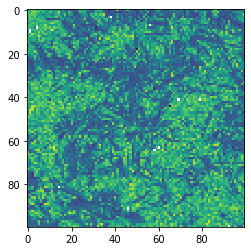

data_2d
[[10.47549057006836 9.790984153747559 11.016380310058594 ...
  7.781541347503662 7.9517903327941895 10.002820014953613]
 [10.6038818359375 10.269707679748535 11.306817054748535 ...
  9.684216499328613 9.90356159210205 7.675217151641846]
 [10.291016578674316 11.005475997924805 11.000911712646484 ...
  8.851465225219727 9.979945182800293 11.152358055114746]
 ...
 [8.9367094039917 7.8103928565979 8.252928733825684 ... 9.74290657043457
  10.597977638244629 9.89165210723877]
 [7.9954938888549805 7.774069309234619 7.944154262542725 ...
  10.207328796386719 9.124740600585938 8.328203201293945]
 [7.8253173828125 7.925834655761719 7.869882583618164 ...
  7.512587070465088 8.060125350952148 11.429228782653809]]


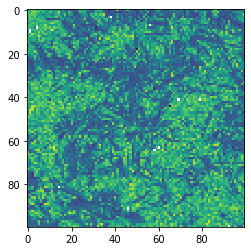

xx
[[  0.         0.         0.       ...   0.         0.         0.      ]
 [  2.524125   2.524125   2.524125 ...   2.524125   2.524125   2.524125]
 [  5.000625   5.000625   5.000625 ...   5.000625   5.000625   5.000625]
 ...
 [242.5065   242.5065   242.5065   ... 242.5065   242.5065   242.5065  ]
 [245.03062  245.03062  245.03062  ... 245.03062  245.03062  245.03062 ]
 [247.50713  247.50713  247.50713  ... 247.50713  247.50713  247.50713 ]]
yy
[[247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 ...
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]
 [247.4595  244.983   242.45888 ...   4.953     2.4765    0.     ]]
~masked_data_2d.mask
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True

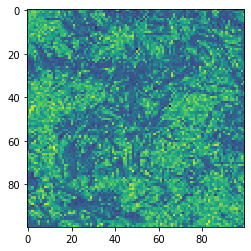

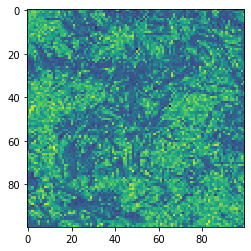

In [10]:
data_1d = hard_df.copy()["Data"].values

# Remove outliers
mean_val = np.mean(data_1d)
stddev_val = np.std(data_1d)
z_scores = 3
data_1d[abs(data_1d - mean_val) > stddev_val * z_scores] = np.nan

data_2d = data_1d.reshape(len(np.unique(x_df)), len(np.unique(y_df)))
print("data_2d")
print(data_2d)

plt.imshow(data_2d)
plt.show()

# mask invalid values
# For every invalid value that exists, mark it as being invalid
# https://numpy.org/doc/stable/reference/generated/numpy.ma.masked_invalid.html
masked_data_2d = np.ma.masked_invalid(data_2d)
print("data_2d")
print(masked_data_2d)

plt.imshow(masked_data_2d)
plt.show()

# All possible points 
all_x_values = np.reshape(x_df["Data"].values, (100, 100))
all_y_values = np.reshape(y_df["Data"].values, (100, 100))

print("xx")
print(all_x_values)
print("yy")
print(all_y_values)

# This value will be false in every cell that needs to be replaced
print("~masked_data_2d.mask")
print(~masked_data_2d.mask)

# get only the valid values
null_x_values = all_x_values[~masked_data_2d.mask]
null_y_values = all_y_values[~masked_data_2d.mask]

unmasked_data_2d = masked_data_2d[~masked_data_2d.mask]

# print("x1")
# print(x1)
# print("y1")
# print(y1)
# print("newarr")
# print(newarr)
# print("len(newarr)")
# print(len(newarr))
# # https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
# # ravel just makes it 1D
# print("newarr.ravel()")
# print(newarr.ravel())
# print("len(newarr.ravel())")
# print(len(newarr.ravel()))

interpolated_grid = interpolate.griddata((null_x_values, null_y_values), unmasked_data_2d, (all_x_values, all_y_values), method='cubic')

# print(grid1)
plt.imshow(interpolated_grid)
plt.show()

x = np.unique(x_df["Data"].values)
y = np.unique(y_df["Data"].values)
# mask invalid values
interpolated_grid = np.ma.masked_invalid(interpolated_grid)
xx, yy = np.meshgrid(x, y)
# get only the valid values
x1 = xx[~interpolated_grid.mask]
y1 = yy[~interpolated_grid.mask]
newarr = interpolated_grid[~interpolated_grid.mask]

grid2 = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='nearest')

# print(grid2)
plt.imshow(grid2)
plt.show()

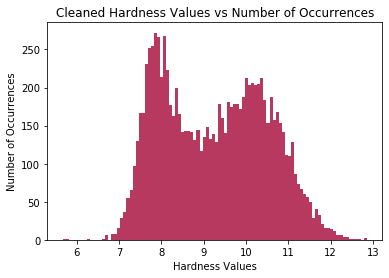

In [11]:

input_data = grid2.reshape(-1, 1)

hard_df = pd.DataFrame(input_data, columns=["Data"])

r = random.random()
b = random.random()
g = random.random()
color = (r, g, b)

plt.hist(hard_df["Data"].values, bins=100, color=color)  # "darkred"
plt.title("Cleaned Hardness Values vs Number of Occurrences")
plt.xlabel("Hardness Values")
plt.ylabel("Number of Occurrences")
plt.show()